# DSFP Session 22 Introduction to Plotly

### Based on a Tutorial by Aaron Geller (CIERA/Northwestern). 

Some wisdom from Aaron:

If you already know Python and you don't really want to learn another coding language, but you do want to create interactive figures (e.g., within a Jupyter notebook and/or for use on a website), you should look into Plotly.  

In particular, [Plotly express](https://plotly.com/python/plotly-express/) is a fantastic tool for generating quick interactive figures without much code.  Plotly express covers a good amount of ground, and you may be able to do all/most your work within Plotly express, depending on your specific needs.  In this workshop, I'll show you Plotly express, but then move beyond it for the majority of the content.  

Though you can do a lot with Plotly, it definitely has limitations (some of which we'll see in this workshop). Also, as with all of the ready-made interactive plot solutions (e.g., [Bokeh](https://docs.bokeh.org/en/latest/), [Altair](https://altair-viz.github.io/), [Glue](https://glueviz.org/), etc.), Plotly has a specific look, which can only be tweaked to a certain extent.  If you like the look well enough and you don't mind the limitations, then it's a good choice. 

In [1]:
## Preliminaries

import pandas as pd
import numpy as np
import scipy.stats

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In the Session 22 repository you will find two data files. They are:

1. plasticc_train_metadata.csv
2. climate_data.csv

## 1: Simulated Rubin Dataset 

We will start with using plotly express to generate plots of simulated Rubin data. 

Create a couple simple Plotly figures using [Plotly express](https://plotly.com/python/plotly-express/).

Plotly express is a simplified version of the Plotly interface for Python that allows users to create many types of Plotly figures with single lines of code.  This greatly simplifies the workflow for some kinds of Plotly figures.  We will start with Plotly express (and for some of your use cases, that may be enough), but we will move on to full blown Plotly for the rest of this tutorial.

## 0) read in the data and examine it as a table

In [7]:
data = pd.read_csv('./plasticc_train_metadata.csv', index_col = False)
data

,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,...,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,615,349.0461,-61.9438,1,0.000,0.000,0.000,-9.000,0.017,92,...,0.0,0.0,59570.000,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
1,713,53.0859,-27.7844,1,1.818,1.627,0.255,45.406,0.007,88,...,0.0,0.0,59570.000,34,108.7,117.7,119.9,149.6,147.9,150.5
2,730,33.5742,-6.5796,1,0.232,0.226,0.016,40.256,0.021,42,...,0.0,0.0,60444.379,9,0.0,0.0,0.0,0.0,0.0,0.0
3,745,0.1899,-45.5867,1,0.304,0.281,1.152,40.795,0.007,90,...,0.0,0.0,60130.453,38,0.0,0.0,0.0,0.0,0.0,0.0
4,1124,352.7113,-63.8237,1,0.193,0.241,0.018,40.417,0.024,90,...,0.0,0.0,60452.641,1,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7843,130739978,26.7188,-14.9403,0,0.000,0.000,0.000,-9.000,0.013,65,...,0.0,0.0,59570.000,18232,26.4,267.6,742.8,3295.1,6047.5,7955.2
7844,130755807,120.1013,-62.6967,0,0.172,2.561,1.115,46.611,0.136,90,...,0.0,0.0,60056.809,14934,0.0,0.0,0.0,0.0,0.0,0.0
7845,130762946,203.1081,-55.6821,0,0.000,0.000,0.000,-9.000,0.430,16,...,0.0,0.0,59570.000,47805,83.8,1124.7,1445.1,1191.2,848.9,382.5
7846,130772921,79.1016,-35.5018,0,0.000,0.000,0.000,-9.000,0.034,65,...,0.0,0.0,59570.000,22240,1.9,14.4,49.4,244.3,534.8,897.2


In [11]:
data.columns

Index(['object_id', 'ra', 'decl', 'ddf_bool', 'hostgal_specz',
       'hostgal_photoz', 'hostgal_photoz_err', 'distmod', 'mwebv', 'target',
       'true_target', 'true_submodel', 'true_z', 'true_distmod',
       'true_lensdmu', 'true_vpec', 'true_rv', 'true_av', 'true_peakmjd',
       'libid_cadence', 'tflux_u', 'tflux_g', 'tflux_r', 'tflux_i', 'tflux_z',
       'tflux_y'],
      dtype='object')

## a) Create a photo-z spec-z scatter plot with px.scatter(data, x = "", y = "")

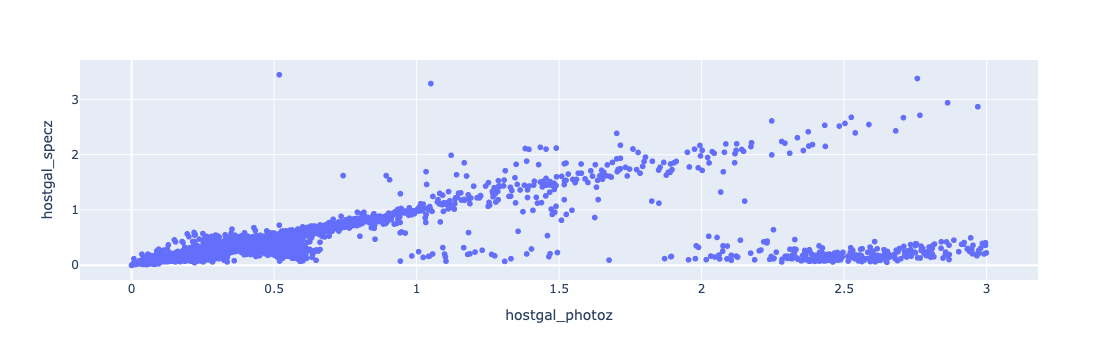

In [13]:
fig = px.scatter(data, x = 'hostgal_photoz', y = 'hostgal_specz')
fig.show()

## b) Now pick a graphical encoding s.t. that your data points express some feature of the dataset. Express supports size and color (or both)

In [ ]:
encoding = ## encoding goes here 
fig = px.scatter()
fig.show()

## c) Now add a hover menu that will display some properties of the data as you move over datapoints. You can do this with "hover_name = " and "hover_data = "

In [ ]:
fig = px.scatter(, 
    hover_name = 
    hover_data = [
    ]
)

fig.show()

## d) change the data range with range = [min, max] in  fig.update_xaxes/fig.update_axes

In [ ]:
xmin, xmax = 
ymin, ymax = 

fig.update_xaxes(title = range = [xmin, xmax])
fig.update_yaxes(title = range = [xmin, xmax])

## e) Now create a bar chart/histogram of some of the meta variables with px.histogram(data, x="",...)
Pick a color encoding s.t. that your histogram conveys a meaningful message about the types of sources in the plasticc dataset

In [ ]:
fig = px.histogram()
fig.show()

## f) Create the plot using the standard Plotly [Graph Object](https://plotly.com/python/graph-objects/).

For the remainder of the tutorial we will use Graph Objects for our Plotly figures.  One motivation here is so that I can create multiple panels in one figure, which can be downloaded to an html file.  (Plotly express will only make an individual figure, and does not support arbitrary subplots.) 

First you create a <b>"trace"</b>, which holds the data.  There are many kinds of traces available in Plotly. (e.g., bar, scatter, etc.).  For this example, we will use a scatter trace.  (Interestingly, the scatter trace object also includes line traces, accessed by changing the "mode" key.  I will show the line version later on.)

Then you create a figure and add the trace to that figure.  A single figure can have multiple traces.

In [ ]:
# Create a plot using Plotly Graph Objects(s)

# Note: We imported the plotly.graph_objects as go.
# create the trace
trace1 = go.Scatter(x = , y = , # x and y values for the plot
    mode = '', # setting mode to markers produces a typical scatter plot
)

# create the figure 
fig = go.Figure()

# add the trace and update a few parameters for the axes
fig.add_trace(trace1)
fig.update_xaxes()
fig.update_yaxes()

fig.show()

# Part 2: Chicago Transit Authority Dataset

In this part, we will explore a time-series dataset over multiple populations or clusters.

## 0) read in the data and visualize as a table
Hint: for the next part to work, you will need to convert the dates in the table using the pd.to_datetime() method.

## a) Create time series traces (entries over time) for entries at stations 42180 (blue) and 40900 (red) organized by daytype.

Pick a reasonable color mapping for your data markers, and define a hovertemplate that provides the date, station name, and daytype when you hover over each point. Then create two plots side by side that enable comparison of the ridership data at both stations.

In [ ]:
# do this for the first station 
# you may need pandas df.loc, something like data.loc[data['feature'] == #####]

trace_CTA = go.Scatter(x = , 
                y = , 
                
                hovertemplate = ,
                text = ,
                hoverlabel=dict(
                bgcolor = 'white',
    )



In [ ]:
# Create the trace(s) for the 2nd station

## b) Now create a side-by-side figure showing the data with a shared y-axis

In [ ]:
# Create the figure and add the traces
# I will use Plotly's "make_subplots" method (imported above).
# Define the number of rows and columns, the column_widths, spacing, and here I will share the y axis.

# Sharing the y axis means that if you zoom/pan on one plot, the other will also zoom/pan.
fig = make_subplots(rows = , cols = , column_widths = , horizontal_spacing = , shared_yaxes = True)

# Add the first trace and update the axes.
# Note that I specify which row and column within each of these commands.
fig.add_trace(, row = 1, col = 1)

fig.update_xaxes(title = 'Date', row = 1, col = 1)
fig.update_yaxes(title = 'Entries', row = 1, col = 1)

# Add the second trace and update the axes.


# Provide an overall title to the figure.
fig.update_layout(title_text = 'Blue Line (Jefferson Park Branch) Terminus vs Red (North Side) Terminus')

# Show the final result
fig.show()

## c) What trends do you notice over time and by datetype?

## Part 3: Climate Data

## 0) Read in the data 

"visualize it as a table"

## b) create two functions, createTraces and createButtons that will loop through the data in our dataset and allow you to select which is plotted.

In [ ]:
columns = []
region = 'Southwest'
rollingAve = 3

regional_data = # subselect the data to one region

#I'm going to write this as a function so that I can reuse it below
def createTraces(columns):
    # For this scenario, I am going to add each of the 4 traces to the plot but only show one at a time
    # Add traces for each column
    
    traces = [
        go.Scatter(x = , y = .rolling(2).mean(), #rolling mean here improves the visualization
            mode = 'lines', # Set the mode the lines (rather than markers) to show a line.
            opacity = 1, 
            marker_color = 'black',
            fill = 'tozeroy',  # This will fill between the line and y=0.
            showlegend = False,
            name = 'Climate Metric',
            hovertemplate = 'Date: %{x}<br>Value: %{y}<extra></extra>', #Note: the <extra></extra> removes the trace label.
            visible = i == 0
        ) for i, c in enumerate(columns)
    ]

    
    return traces


# I'm going to write this as a function so that I can reuse it below
# x,y args to position the buttons
def createButtons(columns, x = 0.0, y = 1.13):
    # create an "updatemenu" with buttons for choosing the data to plot that I will add to the figure later

    updatemenu = dict(
            type = 'buttons',
            direction = 'left', # This defines what orientation to include all buttons.  'left' shows them in one row.
            buttons = list([
                dict(
                    # 'args' tells the button what to do when clicked.  
                    #     In this case it will change the visibility of the traces
                    # 'label' is the text that will be displayed on the button
                    # 'method' is the type of action the button will take.
                    #    method = 'restyle' allows you to redefine certain preset plot styles (including the visible key).  
                    #    See  https://plotly.com/python/custom-buttons/ for different methods and their uses
                    args = [{'visible': [i == j for j in range(len(columns))]}], 
                    label = label.replace('_',' '),
                    method = 'restyle' 
                ) for i, label in enumerate(columns)]),
        
            showactive = True, # Highlight the active button
            # Below is for positioning
            x = x, 
            xanchor = 'left',
            y = y,
            yanchor = 'top'
        )
    
    return updatemenu

## c) Now create the figure

In [ ]:
# Create the figure.
fig = go.Figure()

# create the traces
traces = createTraces(columns)

# add the traces to the figure
for t in traces:
    fig.add_trace(t)
    
# create the buttons and add them to the figure below
buttons = createButtons(columns)

# Update a few parameters for the axes and add the buttons
#   Note: I added a margin to the top ('t') of the plot within fig.update_layout to make room for the buttons.
fig.update_xaxes(title = 'Date')#, range = [np.datetime64('2020-03-01'), np.datetime64('2022-01-12')])
fig.update_yaxes(title = 'Value/Temp/Index')
fig.update_layout(
    title_text = 'Climate Data Explorer : '+ region + '<br>(' + 'July-to-July ' + str(rollingAve) +'-year rolling average)',
    margin = dict(t = 150),
    updatemenus = [buttons]
)

fig.show()

## d) Now add a drop down that allows you to change between the regions. Call this createDropdown

In [ ]:
# I am going to create the dropdown list here and then add it to the figure below
# I will need to update the x and y data for the time series plot 

# Identify the countries to use 
# I will but The United States of America first so that it can be the default country on load (the first button)
availableRegions = # get a list of the unique regions 
# availableRegions.insert(0, availableCountries.pop(availableCountries.index('United States of America'))) 

# I will write this as a function as well and then create a new figure in the next cell that uses this function
# x,y args to position the dropdown
def createDropdown(availableRegions, columns, x = 0.0, y = 1.1):
    # create an "updatemenu" with a dropdown for choosing the data to plot that I will add to the figure later

    dropdown = []
    for c in availableRegions:
        if (c in 'regions'):
            dropdown.append(dict(
                args = [{'x': ["replace this with the appropriate column" == c]['Date']]*len(columns), # the same x values for each trace
                         'y': ["replace this with the appropirate column" == c][col].rolling(rollingAve).mean() for col in columns],
                }],
                label = c,
                method = 'update'
            ))

    updatemenu = dict(
        buttons = dropdown,
            direction = 'down',
            showactive = True,
            x = x,
            xanchor = 'left',
            y = y,
            yanchor = 'top'
        )
        

    return updatemenu

In [ ]:
# Create the figure.
fig = go.Figure()

# create the traces
traces = createTraces(columns)

# add the traces to the figure
for t in traces:
    fig.add_trace(t)

# generate the menus to be added to the figure below
updatemenus = [createButtons(columns, 0, 1.3), createDropdown(availableRegions, columns, 0, 1.15)]

# Update a few parameters for the axes and add the buttons and dropdown
fig.update_xaxes(title = 'Date')#, range = [np.datetime64('2020-03-01'), np.datetime64('2022-01-12')])
fig.update_yaxes(title = 'Value/Temp/Index')
fig.update_layout(
    title_text = 'Climate Explorer : '+ region + '<br>(' + str(rollingAve) +'-year rolling average)',
    title_y = 0.97,
    margin = dict(t = 140),
    updatemenus = updatemenus
)

fig.show()

## Optional Problem

### Create Derived Features from the information in the meta-data. Use these derived features to visualize class boundaries.
